# 1. Đọc và làm sạch dữ liệu

In [3]:
cd '/model_checkpoint/pre-trained LSTM/'

/content/drive/MyDrive/Học máy 4+1/Final Project/task 2/encoder - decoder/model_checkpoint/pre-trained LSTM


In [7]:
!pip install pyvi --quiet
!pip install keras_preprocessing --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.6 MB/s eta 0:00:00


In [9]:
import os
import re
import time
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 

from pyvi import ViTokenizer
from keras import Input, Model
from keras.layers import Embedding, LSTM, Dense
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# 1.1 Đọc dữ liệu

In [10]:
ROOT_DATA = '/data/'

In [11]:
import pickle

# saving
def save_file(data, filename):
    with open(filename + '.pickle', 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
def load_file(filename):
    with open(filename + '.pickle', 'rb') as handle:
        data = pickle.load(handle)
    return data

In [12]:
def getData(file_name_en, file_name_vi):
    path_en = os.path.join(ROOT_DATA, file_name_en)     # lấy đường dẫn của file en
    path_vi = os.path.join(ROOT_DATA, file_name_vi)     # lấy đường dẫn của file vi
    
    with open(path_en,'r',encoding='utf-8') as f:
        en = f.read().splitlines()
    with open(path_vi,'r',encoding='utf-8') as f:
        vi = f.read().splitlines()

    return pd.DataFrame(zip(en,vi), columns=['English', 'Vietnamese'])

In [13]:
df_train = getData('train.en', 'train.vi')
df_tst2012 = getData('tst2012.en', 'tst2012.vi')
df_tst2013 = getData('tst2013.en', 'tst2013.vi')

In [14]:
df_train

,English,Vietnamese
0,Rachel Pike : The science behind a climate hea...,Khoa học đằng sau một tiêu đề về khí hậu
1,"In 4 minutes , atmospheric chemist Rachel Pike...","Trong 4 phút , chuyên gia hoá học khí quyển Ra..."
2,I &apos;d like to talk to you today about the ...,Tôi muốn cho các bạn biết về sự to lớn của nhữ...
3,Headlines that look like this when they have t...,Có những dòng trông như thế này khi bàn về biế...
4,They are both two branches of the same field o...,Cả hai đều là một nhánh của cùng một lĩnh vực ...
...,...,...
133312,I want to end by saying it &apos;s been the ac...,Tôi muốn kết luận rằng hành động của hàng ngàn...
133313,Thank you very much for your time .,Rất cảm ơn đã lắng nghe .
133314,,
133315,Didier Sornette : How we can predict the next ...,Paul Pholeros : Làm sao để bớt nghèo khổ ? Hãy...


## 1.2 Làm sạch dữ liệu

In [15]:
def make_clean_text_vi(text_to_clean):
    res = text_to_clean.lower()
    res = re.sub(r'[!“”"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]', '', res)
    res = re.sub(r'\s+', ' ', res).strip()
    res = ViTokenizer.tokenize(res)
    return res

In [16]:
def make_clean_text_en(text_to_clean):
    res = text_to_clean.lower()
    res = re.sub(r"i'm", "i am", res)
    res = re.sub(r"he's", "he is", res)
    res = re.sub(r"she's", "she is", res)
    res = re.sub(r"it's", "it is", res)
    res = re.sub(r"that's", "that is", res)
    res = re.sub(r"what's", "what is", res)
    res = re.sub(r"where's", "where is", res)
    res = re.sub(r"how's", "how is", res)
    res = re.sub(r"\'ll", " will", res)
    res = re.sub(r"\'ve", " have", res)
    res = re.sub(r"\'re", " are", res)
    res = re.sub(r"\'d", " would", res)
    res = re.sub(r"\'re", " are", res)
    res = re.sub(r"won't", "will not", res)
    res = re.sub(r"can't", "cannot", res)
    res = re.sub(r"n't", " not", res)
    res = re.sub(r"n'", "ng", res)
    res = re.sub(r"'bout", "about", res)
    res = re.sub(r"'til", "until", res)
    res = re.sub(r'[!“”"#$%&\()*+,-./:;<=>?@[\]^_`{|}~]', "", res)
    res = re.sub(r'\s+', ' ', res).strip()
    return res

In [17]:
# Tiền xử lý dữ liệu
df_train['English'] = df_train['English'].apply(make_clean_text_en)
df_train['Vietnamese'] = df_train['Vietnamese'].apply(make_clean_text_vi)

df_tst2012['English'] = df_tst2012['English'].apply(make_clean_text_en)
df_tst2012['Vietnamese'] = df_tst2012['Vietnamese'].apply(make_clean_text_vi)

df_tst2013['English'] = df_tst2013['English'].apply(make_clean_text_en)
df_tst2013['Vietnamese'] = df_tst2013['Vietnamese'].apply(make_clean_text_vi)

In [18]:
df_train

,English,Vietnamese
0,rachel pike the science behind a climate headline,khoa_học đằng sau một tiêu_đề về khí_hậu
1,in 4 minutes atmospheric chemist rachel pike p...,trong 4 phút chuyên_gia hoá_học khí_quyển rach...
2,i aposd like to talk to you today about the sc...,tôi muốn cho các bạn biết về sự to_lớn của nhữ...
3,headlines that look like this when they have t...,có những dòng trông như thế này khi bàn về biế...
4,they are both two branches of the same field o...,cả hai đều là một nhánh của cùng một lĩnh_vực ...
...,...,...
133312,i want to end by saying it aposs been the acti...,tôi muốn kết_luận rằng hành_động của hàng ngàn...
133313,thank you very much for your time,rất cảm_ơn đã lắng_nghe
133314,,
133315,didier sornette how we can predict the next fi...,paul pholeros làm_sao để bớt nghèo_khổ hãy sửa...


In [19]:
# đếm số lượng token (word) trong câu
countToken = lambda text: len(text.split())

df_train['Count (En)'] = df_train['English'].apply(countToken)
df_train['Count (Vi)'] = df_train['Vietnamese'].apply(countToken)
df_train

,English,Vietnamese,Count (En),Count (Vi)
0,rachel pike the science behind a climate headline,khoa_học đằng sau một tiêu_đề về khí_hậu,8,7
1,in 4 minutes atmospheric chemist rachel pike p...,trong 4 phút chuyên_gia hoá_học khí_quyển rach...,45,50
2,i aposd like to talk to you today about the sc...,tôi muốn cho các bạn biết về sự to_lớn của nhữ...,26,24
3,headlines that look like this when they have t...,có những dòng trông như thế này khi bàn về biế...,29,24
4,they are both two branches of the same field o...,cả hai đều là một nhánh của cùng một lĩnh_vực ...,12,14
...,...,...,...,...
133312,i want to end by saying it aposs been the acti...,tôi muốn kết_luận rằng hành_động của hàng ngàn...,36,30
133313,thank you very much for your time,rất cảm_ơn đã lắng_nghe,7,4
133314,,,0,0
133315,didier sornette how we can predict the next fi...,paul pholeros làm_sao để bớt nghèo_khổ hãy sửa...,10,9


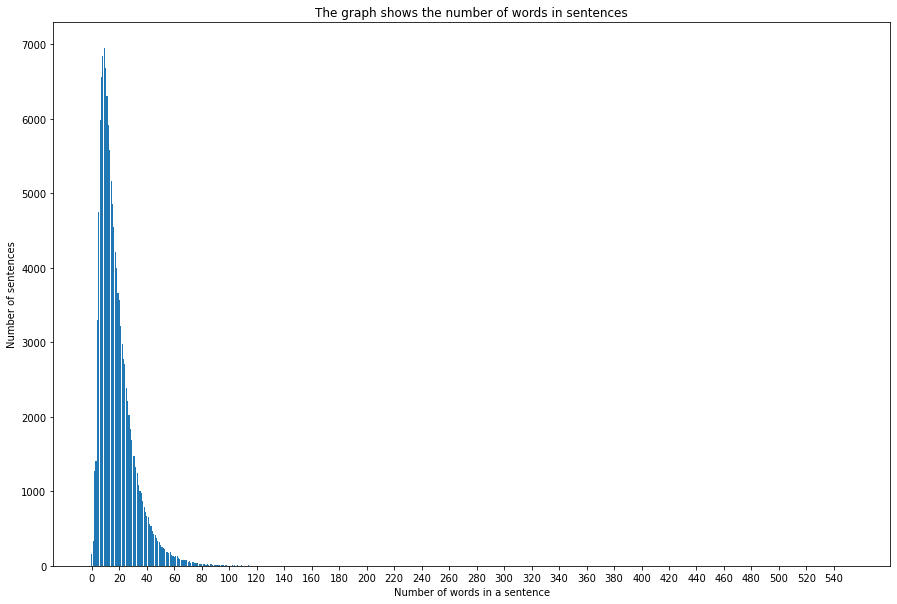

In [20]:
from collections import Counter
import matplotlib.pyplot as plt

count_words_en = df_train['Count (En)']
counter_words_en = Counter(count_words_en)

list_count_word = []
list_count_sent = []
for i in counter_words_en.items():
    #print(i)
    list_count_word.append(i[0])
    list_count_sent.append(i[1])
    
# ========== draw ========== #
plt.figure(figsize=(15,10))
plt.bar(list_count_word,list_count_sent)
plt.title('The graph shows the number of words in sentences')
plt.xlabel('Number of words in a sentence')
plt.ylabel('Number of sentences')
plt.xticks(range(min(list_count_word), max(list_count_word),20))
plt.show()

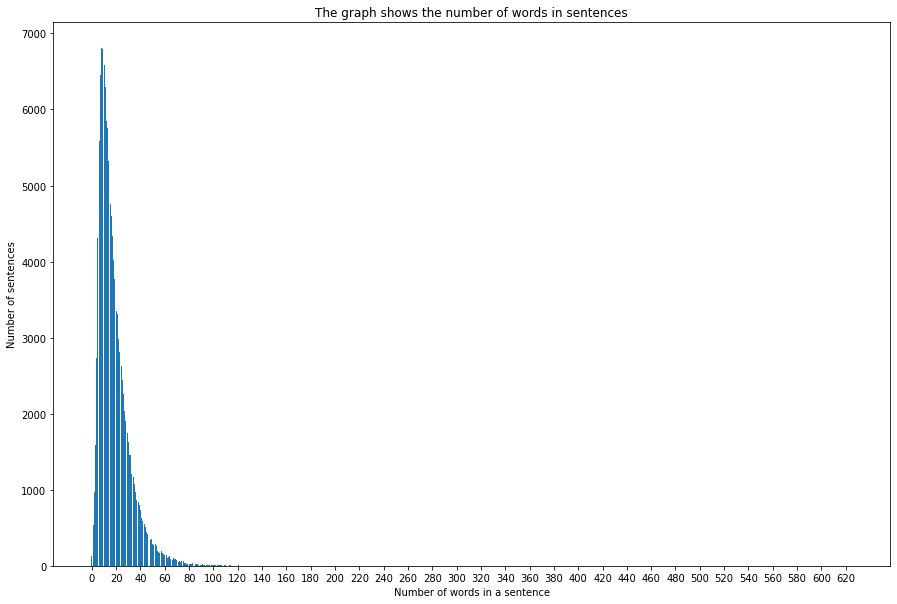

In [21]:
count_words_vi = df_train['Count (Vi)']
counter_words_vi = Counter(count_words_vi)

list_count_word = []
list_count_sent = []
for i in counter_words_vi.items():
    #print(i)
    list_count_word.append(i[0])
    list_count_sent.append(i[1])
    
# ========== draw ========== #
plt.figure(figsize=(15,10))
plt.bar(list_count_word,list_count_sent)
plt.title('The graph shows the number of words in sentences')
plt.xlabel('Number of words in a sentence')
plt.ylabel('Number of sentences')
plt.xticks(range(min(list_count_word), max(list_count_word),20))
plt.show()

In [22]:
MAXLEN = 60

In [23]:
df_train = df_train[(df_train['Count (En)'] <= MAXLEN) & (df_train['Count (En)'] > 0) & (df_train['Count (Vi)'] <= MAXLEN) & (df_train['Count (Vi)'] > 0)]
df_train

,English,Vietnamese,Count (En),Count (Vi)
0,rachel pike the science behind a climate headline,khoa_học đằng sau một tiêu_đề về khí_hậu,8,7
1,in 4 minutes atmospheric chemist rachel pike p...,trong 4 phút chuyên_gia hoá_học khí_quyển rach...,45,50
2,i aposd like to talk to you today about the sc...,tôi muốn cho các bạn biết về sự to_lớn của nhữ...,26,24
3,headlines that look like this when they have t...,có những dòng trông như thế này khi bàn về biế...,29,24
4,they are both two branches of the same field o...,cả hai đều là một nhánh của cùng một lĩnh_vực ...,12,14
...,...,...,...,...
133310,nelson mandela said in the mid2000s not too fa...,nelson maldela từng nói giữa những năm 2000 kh...,23,24
133311,it aposs manmade and can be overcome and eradi...,nó là do con_người và có_thể ngăn_chặn và diệt...,16,14
133312,i want to end by saying it aposs been the acti...,tôi muốn kết_luận rằng hành_động của hàng ngàn...,36,30
133313,thank you very much for your time,rất cảm_ơn đã lắng_nghe,7,4


# 2. Xử lý dữ liệu

## 2.1 Thêm ký tự đầu câu và kết thúc câu cho đầu ra

In [24]:
add_BOS_EOS = lambda text: f'<s> {text} </s>'
df_train.loc[:, 'Vietnamese'] = df_train.applymap(add_BOS_EOS).loc[:, 'Vietnamese']
df_train

,English,Vietnamese,Count (En),Count (Vi)
0,rachel pike the science behind a climate headline,<s> khoa_học đằng sau một tiêu_đề về khí_hậu </s>,8,7
1,in 4 minutes atmospheric chemist rachel pike p...,<s> trong 4 phút chuyên_gia hoá_học khí_quyển ...,45,50
2,i aposd like to talk to you today about the sc...,<s> tôi muốn cho các bạn biết về sự to_lớn của...,26,24
3,headlines that look like this when they have t...,<s> có những dòng trông như thế này khi bàn về...,29,24
4,they are both two branches of the same field o...,<s> cả hai đều là một nhánh của cùng một lĩnh_...,12,14
...,...,...,...,...
133310,nelson mandela said in the mid2000s not too fa...,<s> nelson maldela từng nói giữa những năm 200...,23,24
133311,it aposs manmade and can be overcome and eradi...,<s> nó là do con_người và có_thể ngăn_chặn và ...,16,14
133312,i want to end by saying it aposs been the acti...,<s> tôi muốn kết_luận rằng hành_động của hàng ...,36,30
133313,thank you very much for your time,<s> rất cảm_ơn đã lắng_nghe </s>,7,4


# 2.2 Tokenizer cho English

In [25]:
tokenizer_en = Tokenizer()
tokenizer_en.fit_on_texts(df_train['English'])

save_file(tokenizer_en, 'tokenizer_en') # save

In [26]:
VOCAB_SIZE_EN = len(tokenizer_en.word_index) + 1
print(f'Vocabulary size : {VOCAB_SIZE_EN}')

Vocabulary size : 45646


In [27]:
# encoder
tokenized_en = tokenizer_en.texts_to_sequences(df_train['English'])
encoder_inp = pad_sequences(tokenized_en, maxlen=MAXLEN, padding='post')

print(encoder_inp.shape)
print(df_train['English'][0])
print(tokenized_en[0])
print(encoder_inp[0])

(130912, 60)
rachel pike the science behind a climate headline
[6166, 15264, 1, 289, 547, 5, 675, 4999]
[ 6166 15264     1   289   547     5   675  4999     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0]


# 2.3 Tokenizer cho Vietnamese

In [28]:
tokenizer_vi = Tokenizer(filters='')
tokenizer_vi.fit_on_texts(df_train['Vietnamese'])

save_file(tokenizer_vi, 'tokenizer_vi') # save

In [29]:
VOCAB_SIZE_VI = len(tokenizer_vi.word_index) + 1
print(f'Vocabulary size : {VOCAB_SIZE_VI}')

Vocabulary size : 34083


In [30]:
# decoder
tokenized_vi = tokenizer_vi.texts_to_sequences(df_train['Vietnamese'])
decoder_inp = pad_sequences(tokenized_vi, maxlen=MAXLEN, padding='post')

print(decoder_inp.shape)
print(df_train['Vietnamese'][0])
print(tokenized_vi[0])
print(decoder_inp[0])

(130912, 60)
<s> khoa_học đằng sau một tiêu_đề về khí_hậu </s>
[1, 192, 895, 77, 6, 2968, 28, 844, 2]
[   1  192  895   77    6 2968   28  844    2    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]


In [31]:
for i in range(len(tokenized_vi)):
    tokenized_vi[i] = tokenized_vi[i][1:]
    
padded_target = pad_sequences(tokenized_vi, maxlen=MAXLEN, padding='post')

print(df_train['Vietnamese'][0])
print(tokenized_vi[0])
print(padded_target[0])

<s> khoa_học đằng sau một tiêu_đề về khí_hậu </s>
[192, 895, 77, 6, 2968, 28, 844, 2]
[ 192  895   77    6 2968   28  844    2    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]


In [32]:
encoder_inp.shape, decoder_inp.shape, padded_target.shape

((130912, 60), (130912, 60), (130912, 60))

# 3. Xây dựng và training model

In [ ]:
def generate_batch(encoder_inp_data, decoder_inp_data, padded_target_data, batch_size = 128):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(encoder_inp_data), batch_size):
            encoder_input = encoder_inp_data[j:j+batch_size]
            decoder_input = decoder_inp_data[j:j+batch_size]
            decoder_target = to_categorical(padded_target_data[j:j+batch_size],VOCAB_SIZE_VI)

            yield([encoder_input, decoder_input], decoder_target)

In [ ]:
enc_inputs = Input(shape=(None,))
enc_embedding = Embedding(VOCAB_SIZE_EN, 256, mask_zero=True)(enc_inputs)
_, state_h, state_c = LSTM(256, return_state=True)(enc_embedding)
enc_states = [state_h, state_c]

dec_inputs = Input(shape=(None,))
dec_embedding = Embedding(VOCAB_SIZE_VI, 256, mask_zero=True)(dec_inputs)
dec_lstm = LSTM(256, return_state=True, return_sequences=True)

dec_outputs, _, _ = dec_lstm(dec_embedding, initial_state=enc_states)
dec_dense = Dense(VOCAB_SIZE_VI, activation='softmax')
output = dec_dense(dec_outputs)

In [ ]:
model = Model([enc_inputs, dec_inputs], output)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 256)    11685376    ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, None, 256)    8725248     ['input_2[0][0]']                
                                                                                              

In [ ]:
BATCH_SIZE = 64
EPOCHS = 15

start_train = time.time()
history = model.fit(generate_batch(encoder_inp, decoder_inp, padded_target, batch_size = BATCH_SIZE),
            steps_per_epoch = len(df_train)//BATCH_SIZE,
            epochs=EPOCHS)
time_train = time.time() - start_train
print('Time training for model: {} secs'.format(time_train))

model.save('model.h5')
save_file(history, 'history')

Epoch 1/15
2045/2045 [==============================] - 747s 359ms/step - loss: 1.7717
Epoch 2/15
2045/2045 [==============================] - 689s 337ms/step - loss: 1.5431
Epoch 3/15
2045/2045 [==============================] - 699s 342ms/step - loss: 1.4474
Epoch 4/15
2045/2045 [==============================] - 714s 349ms/step - loss: 1.3864
Epoch 5/15
2045/2045 [==============================] - 719s 352ms/step - loss: 1.3423
Epoch 6/15
2045/2045 [==============================] - 728s 356ms/step - loss: 1.3098
Epoch 7/15
2045/2045 [==============================] - 730s 357ms/step - loss: 1.2832
Epoch 8/15
2045/2045 [==============================] - 735s 360ms/step - loss: 1.2604
Epoch 9/15
2045/2045 [==============================] - 744s 364ms/step - loss: 1.2415
Epoch 10/15
2045/2045 [==============================] - 746s 365ms/step - loss: 1.2253
Epoch 11/15
2045/2045 [==============================] - 748s 366ms/step - loss: 1.2116
Epoch 12/15
2045/2045 [==================

INFO:tensorflow:Assets written to: ram://41ce94fe-0d34-4a1b-851b-89c2d0af3597/assets


INFO:tensorflow:Assets written to: ram://41ce94fe-0d34-4a1b-851b-89c2d0af3597/assets


In [ ]:
def make_inference_models():
    dec_state_input_h = Input(shape=(256,))
    dec_state_input_c = Input(shape=(256,))
    dec_states_inputs = [dec_state_input_h, dec_state_input_c]
    dec_outputs, state_h, state_c = dec_lstm(dec_embedding,
                                            initial_state=dec_states_inputs)
    dec_states = [state_h, state_c]
    dec_outputs = dec_dense(dec_outputs)
    dec_model = Model(
        inputs=[dec_inputs] + dec_states_inputs,
        outputs = [dec_outputs] + dec_states)
    print('Inference decoder:')
    dec_model.summary()
    print('Inference encoder:')
    enc_model = Model(inputs=enc_inputs, outputs=enc_states)
    enc_model.summary()
    return enc_model, dec_model

enc_model, dec_model = make_inference_models()

enc_model.save('enc_model.h5')
dec_model.save('dec_model.h5')

Inference decoder:
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, None, 256)    8725248     ['input_2[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 256)]        0           []                               
                                                                         

# 4. Đánh giá

## 4.1 Khởi tạo các hàm đánh giá

In [ ]:
def str_to_tokens(sentence):
    words = make_clean_text_en(sentence)
    tokens_list = tokenizer_en.texts_to_sequences([words])
    return pad_sequences(tokens_list, maxlen=MAXLEN,padding='post')
    
def translate_val(sentence):
    states_values = enc_model.predict(str_to_tokens(sentence))
    empty_target_seq = np.zeros((1,1))
    empty_target_seq[0,0] = tokenizer_vi.word_index['<s>']
    stop_condition = False
    decoded_translation = ''
    while not stop_condition:
        dec_outputs, h, c = dec_model.predict([empty_target_seq]+states_values)
        sampled_word_index = np.argmax(dec_outputs[0,-1, :])
        sampled_word = None
        for word, index in tokenizer_vi.word_index.items():
            if sampled_word_index == index:
                if word != '</s>':
                    decoded_translation += f'{word} '
                sampled_word = word

        if sampled_word == '</s>' or len(decoded_translation.split()) > MAXLEN:
            stop_condition = True
        empty_target_seq = np.zeros((1,1))
        empty_target_seq[0,0] = sampled_word_index
        states_values = [h,c]

    return decoded_translation

## 4.2 Đánh giá model trên bộ dữ liệu test

# 4.2.1 Tạo dữ liệu để đánh giá

In [ ]:
#2012
%%time
# Predict all test data
# Write all predict into files
predicted2012 = []
start_test_2012 = time.time()

for i in range(len(df_tst2012)):
    pred = translate_val(df_tst2012.iloc[i]['English'])
    if (i+1) % 150 == 0:
        print('index: {}'.format(i+1))
        print('eng: :', df_tst2012.iloc[i]['English'])
        print('vi actual: ', df_tst2012.iloc[i]['Vietnamese'])
        print('vi predicted: ', pred)
    predicted2012.append(pred)

time_test_2012 = time.time() - start_test_2012
print('Test time: {} secs'.format(time_test_2012))
df_tst2012['Predicted vietnamese'] = predicted2012
df_tst2012.to_csv('/translated/model_sequence2sequence_LSTM_with_test_2012.csv', encoding='utf-8', index=False)

index: 150
eng: : and my grandmother was sitting across the room staring at me
vi actual:  bà tôi thì đang ngồi đối_diện nhìn tôi chằm_chằm
vi predicted:  và cô ấy tôi ngồi trong phòng nhìn thấy không 
index: 300
eng: : and she aposd say quot well what are you going to do when you get here quot
vi actual:  bà ấy hỏi quot vậy cậu dự_định sẽ làm gì khi đến đây quot
vi predicted:  cô ấy sẽ nói quot bạn sẽ làm gì đây khi nào đây quot 
index: 450
eng: : and this boat quite ugly is called the mutiara 4
vi actual:  và cái thuyền này đây khá xấu được gọi là mutiara 4
vi predicted:  và cái này gọi là 4 giờ là cái 
index: 600
eng: : and it turns out that making it feel more concrete can actually be a very positive tool to use in getting people to save more
vi actual:  và điều đó chỉ ra rằng làm nó càng rõ_ràng cụ_thể thì càng trở_thành 1 công_cụ hiệu_quả để giúp mọi người tiết_kiệm hơn
vi predicted:  và điều này khiến ta trở_nên dễ_dàng hơn khi thấy rằng người sử_dụng thực_sự hiệu_quả hơn để làm

In [ ]:
#2013 
%%time
# Predict all test data
# Write all predict into files
predicted2013 = []
start_test_2013 = time.time()

for i in range(len(df_tst2013)):
    pred = translate_val(df_tst2013.iloc[i]['English'])
    if (i+1) % 150 == 0:
        print('index: {}'.format(i+1))
        print('eng: :', df_tst2013.iloc[i]['English'])
        print('vi actual: ', df_tst2013.iloc[i]['Vietnamese'])
        print('vi predicted: ', pred)
    predicted2013.append(pred)

time_test_2013 = time.time() - start_test_2013
print('Test time: {} secs'.format(time_test_2013))
df_tst2013['Predicted vietnamese'] = predicted2013
df_tst2013.to_csv('/translated/model_sequence2sequence_LSTM_with_test_2013.csv', encoding='utf-8', index=False)

index: 150
eng: : it aposs a porous asphalt like i said so you have only a small amount of binder between the stones
vi actual:  nó là nhựa xốp như tôi đã nói bạn chỉ có một lượng nhỏ keo dính bám giữa các viên đá
vi predicted:  đây là một phần của một người bạn tôi đã thấy một cái gì đó ở đó chỉ là một phần nhỏ của tôi với khoảng 3 mét 
index: 300
eng: : because mps do not keep the environment clean
vi actual:  vì quân_cảnh không giữ cho môi_trường trong_sạch
vi predicted:  bởi_vì vì môi_trường không cần phải làm gì để giữ lại trong môi_trường sống 
index: 450
eng: : but then after a while i realized this is my life
vi actual:  nhưng sau đó tôi đã nhận ra đây là toàn_bộ cuộc_sống của mình
vi predicted:  nhưng sau đó tôi nhận ra rằng trong đó là một cuộc_sống 
index: 600
eng: : and so scientists and engineers when you aposve solved this equation by all means talk nerdy to me
vi actual:  và do đó hỡi các nhà khoa_học và kĩ_sư khi các anh giải phương_trình này bằng mọi giá hãy nói tám ch

# 4.2.2 Đánh giá model bằng độ đo BLEU score

In [ ]:
import nltk
from nltk.translate.bleu_score import SmoothingFunction
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu

In [ ]:
def custom_bleu_score(refs, hypothesis):
    TotalBLEUscore = 0
    for i in range(len(refs)):
        BLEUscore = sentence_bleu(refs[i], hypothesis[i], smoothing_function=SmoothingFunction().method1)
        TotalBLEUscore += BLEUscore
    return TotalBLEUscore / len(refs)

# y_preds: list
# y_actuals: list
def bleu_score(x_test, y_test):
    BLEUScore = 0
    X_test = [sentence.split(' ') for sentence in x_test] # hypothesis - candidates
    Y_test = [[sentence.split(' ')] for sentence in y_test] # refs
    BLEUScore = custom_bleu_score(Y_test, X_test)
    return BLEUScore

print(df_tst2013.iloc[0]['English'])
print()
print(df_tst2013.iloc[0]['Vietnamese'])
print(df_tst2013.iloc[0]['Predicted vietnamese'])

when i was little i thought my country was the best on the planet and i grew up singing a song called quot nothing to envy quot

khi tôi còn nhỏ tôi nghĩ rằng bắctriều tiên là đất_nước tốt nhất trên thế_giới và tôi thường hát bài quot chúng_ta chẳng có gì phải ghen_tị quot
khi tôi nghĩ tôi đã nghĩ đến một thế_giới thứ ba quot tôi là quot thế_giới quot và quot tại_sao tôi lại có_thể làm được những điều tuyệt_vời trên mặt quot 


In [ ]:
%%time
tst, actual = df_tst2012['Vietnamese'], df_tst2012['Predicted vietnamese']

bleu_on_test_12 = bleu_score(tst, actual)
print("Avg BLEU score (2013): ", bleu_on_test_12)

Avg BLEU score (2013):  0.06129592895514025
CPU times: user 528 ms, sys: 4.95 ms, total: 532 ms
Wall time: 541 ms


In [ ]:
%%time
tst, actual = df_tst2013['Vietnamese'], df_tst2013['Predicted vietnamese']

bleu_on_test_13 = bleu_score(tst, actual)
print("Avg BLEU score (2013): ", bleu_on_test_13)

Avg BLEU score (2013):  0.056979110833749375
CPU times: user 1.12 s, sys: 4 ms, total: 1.12 s
Wall time: 1.16 s


In [ ]:
time_train = float(11009.36831521988)
# loading
def load_file(filename):
    with open(filename + '.pickle', 'rb') as handle:
        data = pickle.load(handle)
    return data
history = load_file('history')

In [ ]:
import json
dict_model = {'time_train': time_train,
              'time_test_2012': time_test_2012,
              'time_test_2013': time_test_2013,
              'bleu_on_test_12': bleu_on_test_12,
              'bleu_on_test_13': bleu_on_test_13,
              'loss_epochs': history.history['loss']}

json = json.dumps(dict_model)
f = open("./value_comparison_of_models/by_model_sequence2sequence_LSTM.json","w")
f.write(json)
f.close()
dict_model

{'bleu_on_test_12': 0.06129592895514025,
 'bleu_on_test_13': 0.056979110833749375,
 'loss_epochs': [1.7716612815856934,
  1.5431487560272217,
  1.4473576545715332,
  1.3864251375198364,
  1.3423477411270142,
  1.3097660541534424,
  1.2831674814224243,
  1.2604478597640991,
  1.241507887840271,
  1.225339651107788,
  1.211637258529663,
  1.1981810331344604,
  1.1845073699951172,
  1.1668747663497925,
  1.154430627822876],
 'time_test_2012': 2842.333967447281,
 'time_test_2013': 2623.6909346580505,
 'time_train': 11009.36831521988}